# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [509]:
#Import all the necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [510]:
colnames = ['preg', 'glucose', 'BP', 'skin', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'age', 'Outcome']
pima_df = pd.read_csv("pima-indians-diabetes.data", names=colnames)
print(pima_df.describe())
pima_df

             preg     glucose          BP        skin     Insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

       DiabetesPedigreeFunction         age     Outcome  
count                768.000000  768.000000  768.000000  
mean                   0.471876   33.240885    0.348958  
std                    0.331329   11.760232    0.476951  
min                    0.078000   21.0

,preg,glucose,BP,skin,Insulin,BMI,DiabetesPedigreeFunction,age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [511]:
print(pima_df.head(10))

   preg  glucose  BP  skin  Insulin   BMI  DiabetesPedigreeFunction  age  \
0     6      148  72    35        0  33.6                     0.627   50   
1     1       85  66    29        0  26.6                     0.351   31   
2     8      183  64     0        0  23.3                     0.672   32   
3     1       89  66    23       94  28.1                     0.167   21   
4     0      137  40    35      168  43.1                     2.288   33   
5     5      116  74     0        0  25.6                     0.201   30   
6     3       78  50    32       88  31.0                     0.248   26   
7    10      115   0     0        0  35.3                     0.134   29   
8     2      197  70    45      543  30.5                     0.158   53   
9     8      125  96     0        0   0.0                     0.232   54   

   Outcome  
0        1  
1        0  
2        1  
3        0  
4        1  
5        0  
6        1  
7        0  
8        1  
9        1  


# Q3 Print the datatypes of each column and the shape of the dataset 

In [512]:
print(pima_df.dtypes)
print("The shape of the data is")
print(pima_df.shape)

preg                          int64
glucose                       int64
BP                            int64
skin                          int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
age                           int64
Outcome                       int64
dtype: object
The shape of the data is
(768, 9)


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [513]:
pima_df["glucose"] = pima_df["glucose"].replace(0,pima_df["glucose"].median())
pima_df["BP"] = pima_df["BP"].replace(0,pima_df["BP"].median())
pima_df["skin"] = pima_df["skin"].replace(0,pima_df["skin"].median())
pima_df["Insulin"] = pima_df["Insulin"].replace(0,pima_df["Insulin"].median())
pima_df["BMI"] = pima_df["BMI"].replace(0,pima_df["BMI"].median())

# Q5 Print the descriptive statistics of each & every column using describe() function

In [514]:
pima_df.describe()

,preg,glucose,BP,skin,Insulin,BMI,DiabetesPedigreeFunction,age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

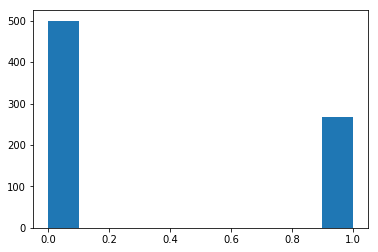

In [515]:
plt.hist(pima_df["Outcome"])

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

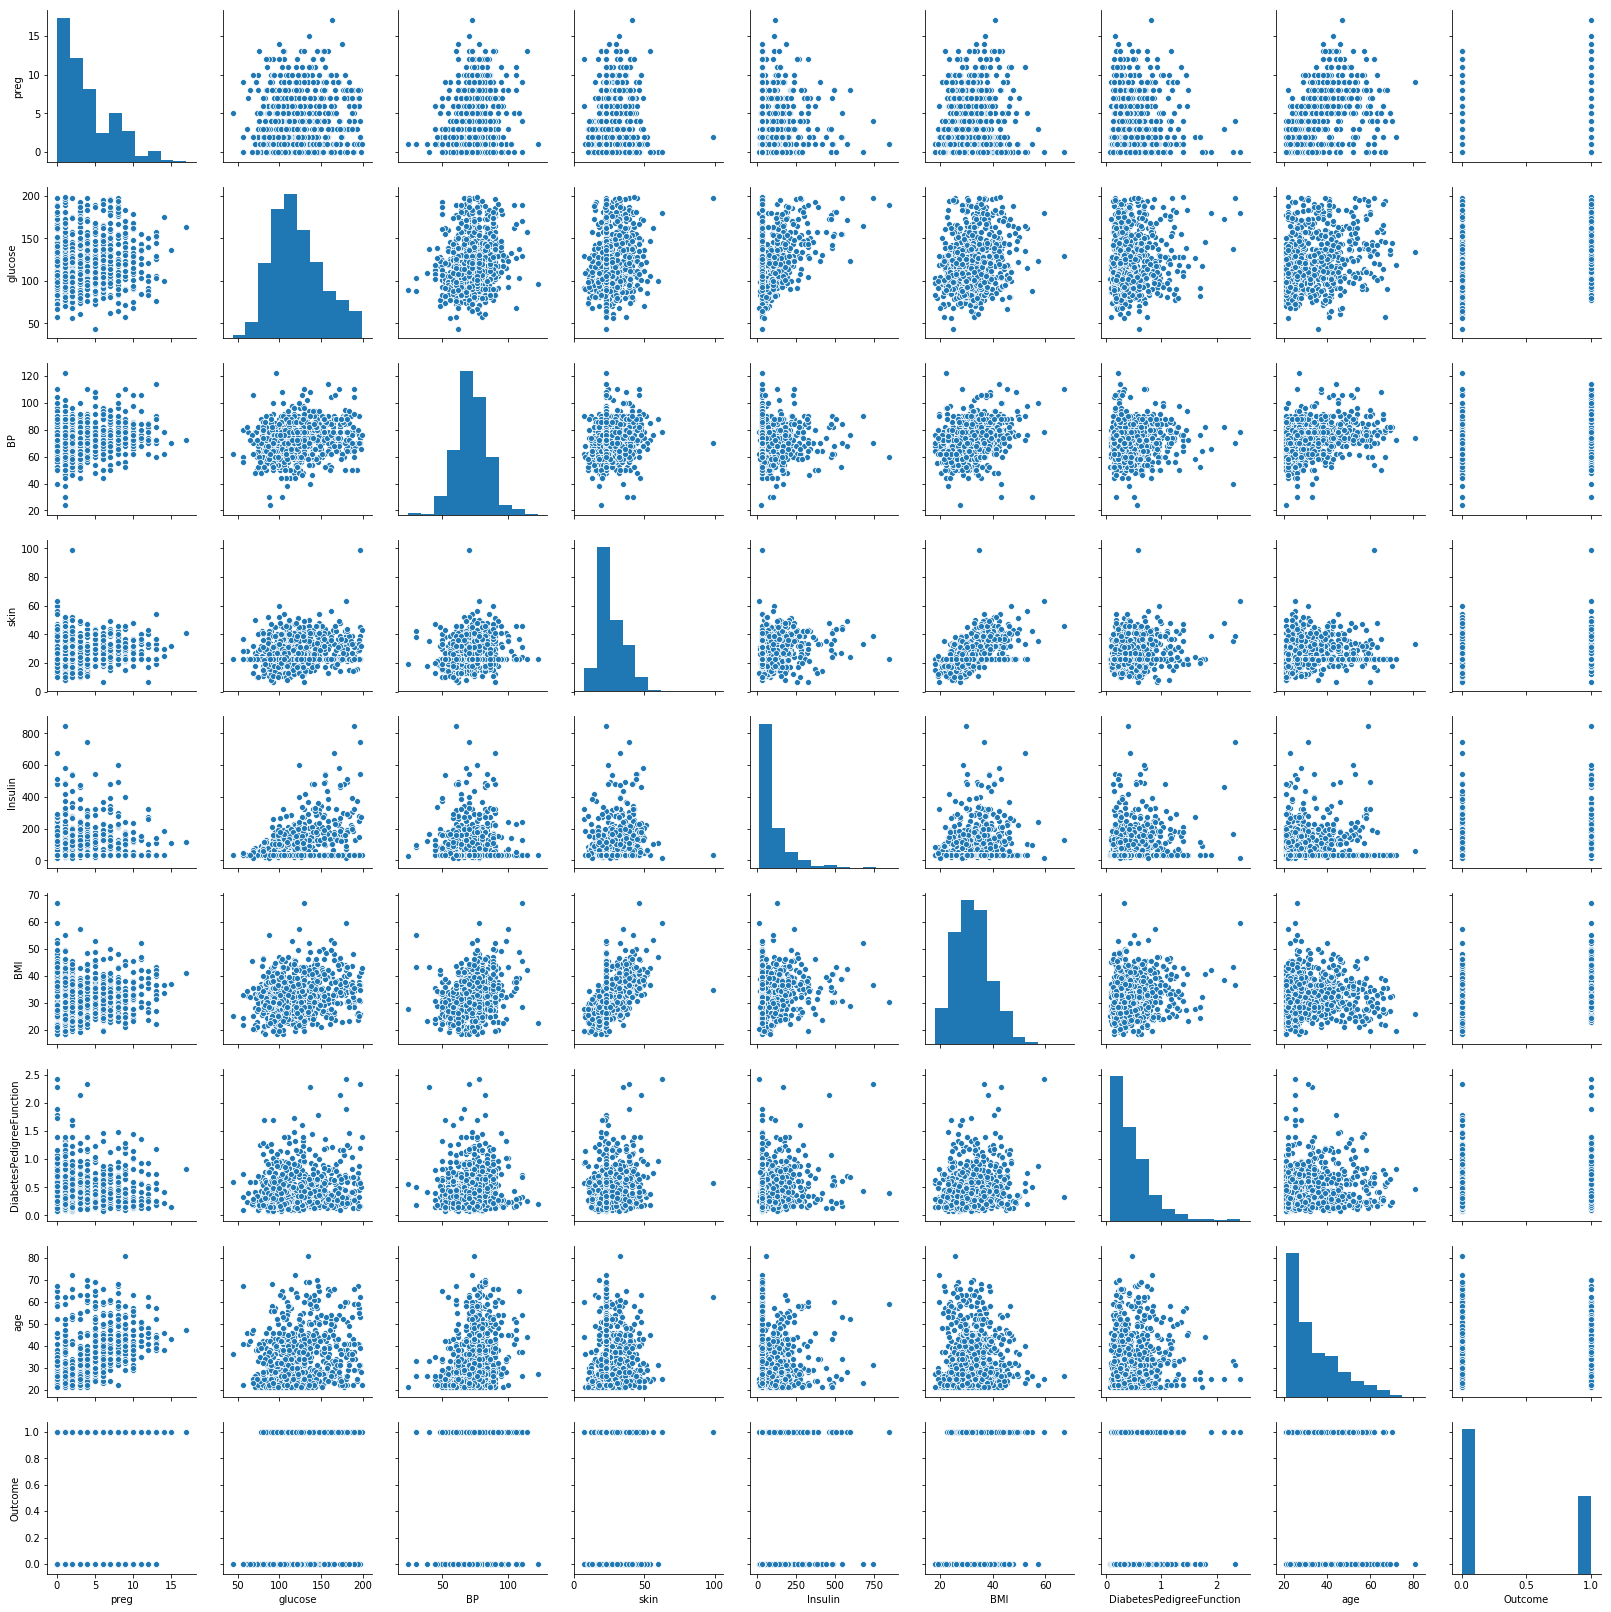

In [516]:
sb.pairplot(pima_df)

In [517]:
print("The below is the correlation table which show that, if two category is positively correlated, the increase in one variable will lead to the increase in the other variable.")
print("If two variables are neagtively correlated, the increase in one will lead to the decrease in the other.")
pima_df.corr()


The below is the correlation table which show that, if two category is positively correlated, the increase in one variable will lead to the increase in the other variable.
If two variables are neagtively correlated, the increase in one will lead to the decrease in the other.


,preg,glucose,BP,skin,Insulin,BMI,DiabetesPedigreeFunction,age,Outcome
preg,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BP,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
skin,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [518]:
X = pima_df.drop("Outcome", axis=1)
y = pima_df["Outcome"]
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [519]:
model = DecisionTreeClassifier(max_depth=4,criterion='entropy',random_state=0)
model.fit(X_train,y_train)
ypred = model.predict(X_test)

# Q10 Print the accuracy of the model & print the confusion matrix 

In [520]:
accuracy=metrics.accuracy_score(y_test,ypred)
print("The accuracy using Decision tree is",accuracy)
confmat=metrics.confusion_matrix(y_test,ypred)
print(confmat)

The accuracy using Decision tree is 0.7316017316017316
[[106  41]
 [ 21  63]]


Print the feature importance of the decision model - Optional

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [521]:
randomforestmodel = RandomForestClassifier(n_estimators=51,criterion='entropy',random_state=0)
randomforestmodel.fit(X_train,y_train)
ypred = randomforestmodel.predict(X_test)

In [522]:
accuracy=metrics.accuracy_score(y_test,ypred)
print("The accuracy using Random Forest is",accuracy)

The accuracy using Random Forest is 0.7489177489177489


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [523]:
adaBoostLR = AdaBoostClassifier(base_estimator=randomforestmodel,n_estimators=50,random_state=2)
adaBoostLR.fit(X_train,y_train)
ypred = adaBoostLR.predict(X_test)

In [524]:
accuracy=metrics.accuracy_score(y_test,ypred)
print("The accuracy using Adaboost is",accuracy)

The accuracy using Adaboost is 0.7748917748917749


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [525]:
baggingClassifier = BaggingClassifier(base_estimator=model,n_estimators=15,random_state=2)
baggingClassifier.fit(X_train,y_train)
ypred = baggingClassifier.predict(X_test)

In [526]:
accuracy=metrics.accuracy_score(y_test,ypred)
print("The accuracy using Bagging Classifier is",accuracy)

The accuracy using Bagging Classifier is 0.7489177489177489


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [527]:
gb_model=GradientBoostingClassifier(n_estimators=50,random_state=2)

In [528]:
gb_model.fit(X_train,y_train)
ypred = gb_model.predict(X_test)

In [529]:
accuracy=metrics.accuracy_score(y_test,ypred)
print("The accuracy using Bagging Classifier is",accuracy)

The accuracy using Bagging Classifier is 0.7878787878787878


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.